## Introduction

 **K-means** est largement utilisé pour le clustering dans de nombreuses applications de science des données, il est particulièrement utile si vous avez besoin de découvrir rapidement des informations à partir de **données non étiquetées**. Dans ce carnet, vous apprendrez à utiliser les k-moyennes pour la segmentation de la clientèle.
Quelques applications réelles de k-means :
- Segmentation de la clientèle
- Comprendre ce que les visiteurs d'un site web essaient d'accomplir
- Reconnaissance des formes
- Apprentissage automatique
- Compression de données

Dans ce carnet, nous pratiquons le clustering k-means avec 2 exemples :
- k-means sur un jeu de données généré aléatoirement
- Utilisation des k-means pour la segmentation de la clientèle




<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#random_generated_dataset">k-Means on a randomly generated dataset</a></li>
            <ol>
                <li><a href="#setting_up_K_means">Setting up K-Means</a></li>
                <li><a href="#creating_visual_plot">Creating the Visual Plot</a></li>
            </ol>
        <p></p>
        <li><a href="#customer_segmentation_K_means">Customer Segmentation with K-Means</a></li>
            <ol>
                <li><a href="#pre_processing">Pre-processing</a></li>
                <li><a href="#modeling">Modeling</a></li>
                <li><a href="#insights">Insights</a></li>
            </ol>
    </ul>
</div>
<br>
<hr>


In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

<h1 id="customer_segmentation_K_means">Customer Segmentation with K-Means</h1>

Imaginez que vous disposiez d'un ensemble de données sur les clients et que vous deviez appliquer la segmentation de la clientèle à ces données historiques.
La segmentation de la clientèle consiste à diviser une base de clients en groupes d'individus présentant des caractéristiques similaires. Il s'agit d'une stratégie importante car une entreprise peut cibler ces groupes spécifiques de clients et allouer efficacement les ressources marketing. Par exemple, un groupe peut contenir des clients à forte rentabilité et à faible risque, c'est-à-dire plus susceptibles d'acheter des produits ou de s'abonner à un service. La tâche de l'entreprise consiste à fidéliser ces clients. Un autre groupe peut comprendre des clients d'organisations à but non lucratif, et ainsi de suite.




In [13]:
import pandas as pd
cust_df = pd.read_csv("data.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


<h2 id="pre_processing">Pre-processing</h2


Comme vous pouvez le constater, __Address__ dans cet ensemble de données est une variable catégorielle. L'algorithme k-means n'est pas directement applicable aux variables catégorielles car la fonction de distance euclidienne n'est pas vraiment significative pour les variables discrètes. Abandonnons donc cette caractéristique et lançons le clustering.

In [14]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


#### Normalisation sur l'écart type
Normalisons maintenant l'ensemble de données. Mais pourquoi avons-nous besoin de normaliser en premier lieu ? La normalisation est une méthode statistique qui aide les algorithmes mathématiques à interpréter de la même manière des caractéristiques ayant des amplitudes et des distributions différentes. Nous utilisons __StandardScaler()__ pour normaliser notre ensemble de données.


In [15]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

<h2 id="modeling">Modeling</h2>


Dans notre exemple (si nous n'avions pas accès à l'algorithme des K-Means), cela reviendrait à supposer que chaque groupe de clients a un certain âge, un certain revenu, un certain niveau d'éducation, etc. Cependant, l'utilisation de l'algorithme des K-moyennes nous permet de réaliser toutes ces opérations beaucoup plus facilement.

Appliquons les K-Means à notre ensemble de données et examinons les étiquettes des groupes.

In [16]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 1 0 2 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 2 2 0 2 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 1 0 0 0 2 0 2 2 2 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1
 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 2 0 2 2 2 0 0 2 2 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 0 

<h2 id="insights">Insights</h2>

Nous attribuons les étiquettes à chaque ligne de la base de données.

In [17]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


Nous pouvons facilement vérifier les valeurs des centroïdes en calculant la moyenne des caractéristiques de chaque groupe.

In [18]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.006154,32.967692,1.613846,6.389231,31.204615,1.032711,2.108345,0.284658,10.095385
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,403.780220,41.368132,1.961538,15.252747,84.076923,3.114412,5.770352,0.172414,10.725824


Examinons maintenant la répartition des clients en fonction de leur âge et de leur revenu :

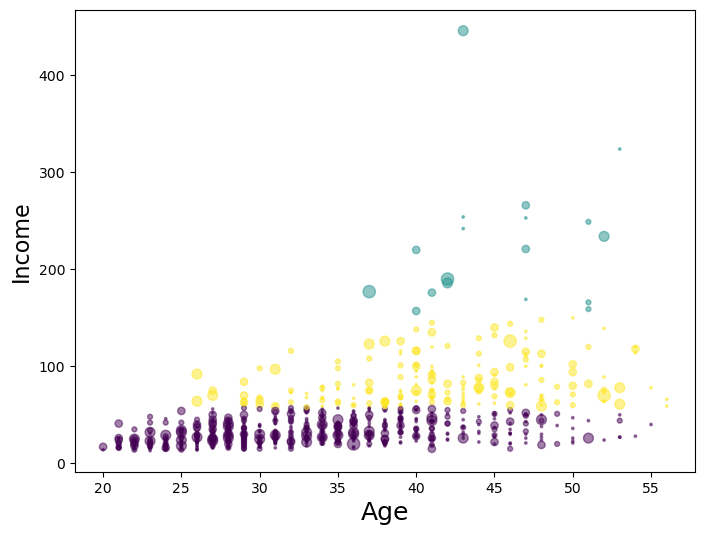

In [19]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()


In [20]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(float))


k-means répartit vos clients en groupes mutuellement exclusifs, par exemple en 3 groupes. Les clients de chaque groupe sont similaires les uns aux autres d'un point de vue démographique.
Nous pouvons maintenant créer un profil pour chaque groupe, en tenant compte des caractéristiques communes de chaque groupe. 
Par exemple, les trois groupes peuvent être les suivants

- AISÉS, ÉDUQUÉS ET ÂGÉS
- D'ÂGE MOYEN ET À REVENUS MOYENS
- JEUNES ET À FAIBLES REVENUS